In [1]:
%reset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy import stats
from scipy.stats import norm
import statsmodels.api as sm

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


# Non-parametric independent samples test

A clinical trial is run to assess the effectiveness of a new anti-retroviral therapy for patients with HIV. Patients are randomized to receive a standard anti-retroviral therapy (usual care) or the new anti-retroviral therapy and are monitored for 3 months. The primary outcome is viral load which represents the number of HIV copies per milliliter of blood. A total of 30 participants are randomized and the data are shown below.

Standard Therapy Viral Load = ST   
New Therapy Viral Load = NT

In [2]:
ST=pd.Series([7500,8000,2000,550,1250,1000,2250,6800,3400,6300,9100,970,1040,670,400],name="ST")
NT=pd.Series([400,250,800,1400,8000,7400,1020,6000,920,1420,2700,4200,5200,4100,1],name="NT")
HIVDF = pd.DataFrame(ST)
HIVDF["NT"]=NT
HIVDF

,ST,NT
0,7500,400
1,8000,250
2,2000,800
3,550,1400
4,1250,8000
5,1000,7400
6,2250,1020
7,6800,6000
8,3400,920
9,6300,1420


Let's look at the data

<AxesSubplot:>

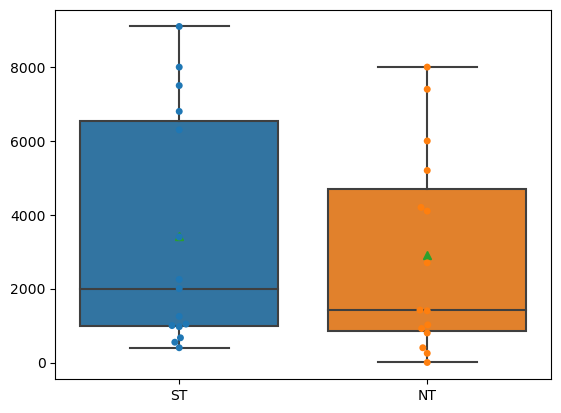

In [3]:
# explore the data
sns.boxplot(data=HIVDF,showmeans=True)
sns.swarmplot(data=HIVDF)

It looks like the mean and median of ST is higher than NT, but that they are fairly equivalent.  We will run a statistical test to see if these groups are different.  Which test?  They are independent groups, so we will run a 2-sample independent test.  Are they normally distributed samples?  If they are then you could think of a Student's t-test for independent samples. If they are not then you need to think of a nonparamateric test that does not rely on the normality of the samples.  Are the samples normally distributed?  They don't look like it based on the boxplots:  the distributions both appear to be right skewed.
We can look at qq plots or run a Shapiro-Wilks test to further decide on the normality of the distributions. 

In [4]:
stats.shapiro(ST)

ShapiroResult(statistic=0.8186454176902771, pvalue=0.006443269085139036)

In [5]:
stats.shapiro(NT)

ShapiroResult(statistic=0.8781939148902893, pvalue=0.04459455981850624)

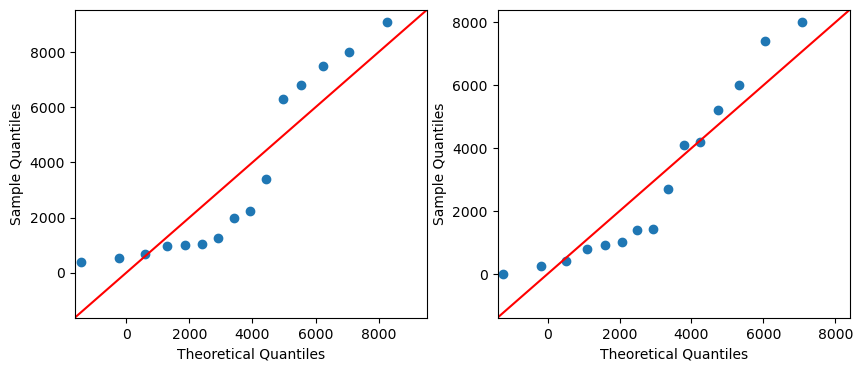

In [6]:
ST.sort_values()
NT.sort_values()
fig2,ax2=plt.subplots(nrows=1,ncols=2,figsize=(10,4))
sm.qqplot(ST,line='45',loc=np.mean(ST),scale=np.std(ST,ddof=1),ax=ax2[0])
sm.qqplot(NT,line='45',loc=np.mean(NT),scale=np.std(NT,ddof=1),ax=ax2[1])
plt.show()

From the looks of the qq plots (the deviation from the data points to the diagonal line) and the results of the normality Shapiro-Wilks tests (p-value <0.05 therfore rejecting the null hypothesis that the the data is normal), we decide that the data are not normal, and therfore want to use a Nonparametric test.

Set up hypothesis and determine significance level:

H$_{0}$ = The two population distributions are equal  
H$_{1}$ = The two population distributions are not equal

alpha = 0.05

Then run the appropriate test:  The Wilcoxon Rank Sum Test = Mann-Whitney U test

In [7]:
stats.mannwhitneyu(NT,ST,use_continuity=False,method='auto')

MannwhitneyuResult(statistic=100.0, pvalue=0.6040458254801915)

To do this by hand:

Set up the hypothesis:  \
H0:  the distributions of the populations from which the samples were drawn are equal.  In general, we can state that this is showing a difference in the medians of the samples. \
HA: the distributions are not equal.

alpha=0.05

First, sort then rank all of the sample together.  For ties, assign a rank equal to the midpoint of the unadjusted rankings.

In [8]:
Rankssorted=pd.DataFrame([[400,550,670,970,1000,1040,1250,2000,2250,3400,6300,6800,7500,8000,9100],[1,250,400,800,920,1020,1400,1420,2700,4100,4200,5200,6000,7400,8000]])
Rankssorted

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,400,550,670,970,1000,1040,1250,2000,2250,3400,6300,6800,7500,8000,9100
1,1,250,400,800,920,1020,1400,1420,2700,4100,4200,5200,6000,7400,8000


In [9]:
Ranksranked=pd.DataFrame([[0,0,3.5,5,6,0,0,9,10,0,12,13,0,0,16,17,0,19,0,0,0,0,24,25,0,27,28.5,30],[1,2,3.5,0,0,7,8,0,0,11,0,0,14,15,0,0,18,0,20,21,22,23,0,0,26,0,28.5,0]])
Ranksranked

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0,0,3.5,5,6,0,0,9,10,0,...,0,0,0,0,24,25,0,27,28.5,30
1,1,2,3.5,0,0,7,8,0,0,11,...,20,21,22,23,0,0,26,0,28.5,0


sum the ranks:  ST = 245; NT=220

Calculate the test statistic U: \
U1 = n1n2 +0.5n1(n1 +1)−R1 \
U2= n1n2 +0.5n2 (n2 +1)− R2

In [10]:
U1=15*15+0.5*15*(16)-245
U2=15*15+0.5*15*(16)-220
print(U1)
print(U2)

100.0
125.0


Use the smaller U value to compare with the critical U value at n1=15 and n2=15 at two-sided significance level=0.05.  Look this up on the critical U table:  Critical U=64. \

Decision rule is that we reject the null hypothesis if U<= 64.

We fail to reject the null hypothesis because 100 is not less than or equal to 64. To be significant, the calculated test statistic U has to be equal to or less than the critical value.  We have shown that the populations of the viral loads are not statistically different.  